# Proyek Customer Churn
- **Nama:** [Ari Fansuri]
- **Email:** [arfansurti26@gmail.com]

## Import Semua Packages/Library yang Digunakan

Mengimpor dan instal semua library yang dibutuhkan.

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import pickle
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout, Concatenate


## Data Preparation

Mengimpor dataset dari kaggle dan melakukan ekstrak data dari format berekstensi zip.

In [ ]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arifansuri","key":"d3981188f1dc2bffbb2c07769fc846b0"}'}

In [ ]:
# Import dataset dari kaggle
!kaggle datasets download -d bhanupratapbiswas/fashion-products -p /content/

# Ekstrak file yang sudah diunduh
!unzip fashion-products.zip

Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products
License(s): other
  0% 0.00/19.7k [00:00<?, ?B/s]
100% 19.7k/19.7k [00:00<00:00, 37.5MB/s]
Archive:  fashion-products.zip
  inflating: fashion_products.csv    


## Data Understanding

## Data Loading

Memuat data yang telah diekstrak dan melakukan assign ke variabel baru bernama df.

In [ ]:
# Memuat dataset yang sudah dipersiapkan
df = pd.read_csv('/content/fashion_products.csv')

In [ ]:
# Memastikan header dan 5 baris teratas dataset
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [ ]:
# Memastikan header dan 5 baris dataset teratas-tertabawah
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [ ]:
# Mengubah nama kolom dengan spasi menjadi underscore
df.columns = [col.replace(' ', '_') for col in df.columns]

# Menampilkan nama kolom setelah perubahan
print("Nama kolom setelah perubahan:")
print(df.columns)

Nama kolom setelah perubahan:
Index(['User_ID', 'Product_ID', 'Product_Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')


## EDA

Bagian Exploratory Data Analysis (EDA) ini bertujuan untuk mengeksplorasi dataset secara mendalam guna memahami berbagai karakteristik, pola, serta hubungan antar variabel yang mungkin ada. EDA membantu mengidentifikasi tren, anomali, serta pola distribusi, sekaligus menemukan korelasi yang relevan untuk model atau keputusan yang akan diambil. Dengan menggunakan visualisasi data dan statistik deskriptif, dapat menggali lebih dalam untuk mendapatkan wawasan insight berharga yang dapat mendukung langkah pemodelan dan pengambilan keputusan berikutnya.

### Deskripsi Variabel

Untuk mengetahi detail informasi pada dataset yang digunakan seperti, jumlah kolom, row, informasi data null dan tipe data, dapat menggunakan fungsi `.info`

In [ ]:
# Memastikan informasi tipe data pada masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User_ID       1000 non-null   int64  
 1   Product_ID    1000 non-null   int64  
 2   Product_Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


-   **Ukuran Dataset**: Dataset memiliki  1000 entri, cukup komprehensif untuk analisis dasar di sektor fashion.
-   **Kolom Informasi**: Terdapat 9 kolom yang mencakup informasi seperti identitas produk (`Product_ID`), nama produk, merek, kategori, harga, hingga atribut seperti warna (`Color`) dan ukuran (`Size`).
-   **Jenis Data**: Data ini berisi kombinasi tipe numerik (`int64`,  `float64`) dan kategorikal (`object`), yang memungkinkan eksplorasi data yang kaya untuk berbagai tujuan seperti klasifikasi, analisis harga, atau rekomendasi produk.
-   **Sumber**: Dataset ini berasal dari komunitas Kaggle dan ditujukan untuk membantu eksplorasi data fashion atau pengembangan model machine learning di bidang ini.

Untuk mengetahui gambaran statistik deskriptif dari dataset, digunakan fungsi `.describe`

In [ ]:
# Melakukan analisis statistik sederhana pada kolom data numerikal
df.describe()

,User_ID,Product_ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


Dataset ini terdiri dari 1000 data pengguna, produk, harga, dan rating.  Harga produk pada kolom  **Price**  memiliki rata-rata 55,79 dan standar deviasi 26,29, yang menunjukkan variasi harga cukup moderat. Harga berkisar dari 10 hingga 100, dengan sebagian besar produk memiliki harga di antara 33 dan 78,25. Jumlah rata-rata **Rating** produk adalah 2,99 dengan standar deviasi 1,15. Rating minimum adalah 1 dan maksimum 4,99, dengan sebagian besar produk mendapatkan rating antara 1,99 dan 3,99.

### Missing Value dan Outliers

Penting untuk mengidentifikasi keberadaan nilai nol dalam dataset, terutama pada kolom numerik. Nilai nol dapat mewakili data yang hilang atau menunjukkan adanya pengisian data yang tidak sesuai konteks. Pada sel berikut, digunakan untuk menghitung jumlah nilai nol dalam setiap kolom dataset untuk memastikan apakah ada nilai yang perlu diperhatikan lebih lanjut.

In [ ]:
# Memastikan sel berisi angka nol
nol_value = (df == 0).sum()
print(nol_value)

User_ID         0
Product_ID      0
Product_Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64


Berdasarkan output yang dihasilkan, menunjukan bahwa seluruh sel tidak ada yang memuat konten dengan angka nol.

Langkah penting dalam analisis data adalah memeriksa keberadaan nilai *null* (kosong) dalam dataset. Nilai *null* menunjukkan data yang hilang, yang dapat memengaruhi analisis atau model yang akan dibangun. Pada sel berikut, kita menghitung jumlah nilai *null* dalam setiap kolom dataset untuk menentukan langkah penanganan yang diperlukan, seperti imputasi atau penghapusan data.

In [ ]:
# Memastikan kolom berisi data Null
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Product_Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


Berdasarkan hasil pengecekan pada dataframe, tidak ditemukan adanya sel bernilai "null"/Nan/Kosong.

Untuk memastikan integritas data, kita perlu memeriksa apakah ada baris yang duplikat dalam dataset. Baris yang duplikat dapat menyebabkan bias atau distorsi dalam analisis, terutama jika analisis atau model bergantung pada keunikan data.

Pada sel berikut, fungsi `df.duplicated()` digunakan untuk mengidentifikasi baris yang duplikat, dengan hasil berupa nilai *boolean* untuk setiap baris (True jika duplikat, False jika unik).

In [ ]:
# Mengetahui kolom yang memiliki sel duplikat
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


Berdasarkan output yang dihasilkan, dataset yang digunakan tidak memiliki kolom duplikat.

Dalam mengidentifikasi outlier yang mungkin ada pada dataset, maka digunakan visualisasi menggunakan Boxplot.

Langkah-langkah yang dilakukan dalam kode ini meliputi:

1. **Pemilihan Kolom Numerik**:
   - Kolom numerik dipilih berdasarkan tipe datanya, yaitu `int64` dan `float64`.
   - Beberapa kolom seperti `User_ID`, `Product_ID`, dan `Category` dikecualikan karena tidak relevan untuk analisis statistik.

2. **Pengaturan Ukuran Plot**:
   - Ukuran plot disesuaikan agar setiap *boxplot* terlihat jelas dengan memanfaatkan panjang dinamis berdasarkan jumlah kolom numerik.

3. **Pembuatan Boxplot**:
   - Untuk setiap kolom numerik yang dipilih, dibuat *boxplot* yang memberikan gambaran mengenai distribusi data, seperti nilai tengah, sebaran data, dan keberadaan *outliers*.

4. **Penyesuaian Tata Letak**:
   - Dengan `plt.tight_layout()`, tata letak plot disesuaikan agar tidak terjadi tumpang tindih di antara plot.

Hasil visualisasi ini akan membantu dalam mengidentifikasi pola distribusi dan potensi anomali dalam dataset.

Pendekatan menggunakan boxplot sangat penting untuk memahami karakteristik statistik data dan mendeteksi nilai-nilai ekstrem yang dapat memengaruhi model analitik atau prediktif.

1. **Seleksi Kolom Numerik**:
   - Kolom dengan tipe data `int64` dan `float64` dipilih untuk dianalisis.
   - Kolom seperti `User_ID`, `Product_ID`, dan `Category` dikecualikan karena tidak relevan untuk visualisasi distribusi data.

2. **Pengaturan Ukuran Plot**:
   - Ukuran keseluruhan plot disesuaikan secara dinamis berdasarkan jumlah kolom numerik yang akan divisualisasikan, sehingga setiap plot memiliki ruang yang cukup.

3. **Pembuatan Boxplot**:
   - Untuk setiap kolom numerik, dibuat *boxplot* yang memberikan gambaran tentang:
     - Nilai median (garis tengah kotak).
     - Persebaran kuartil data.
     - Nilai ekstrem (*outliers*) jika ada.

4. **Penyesuaian Tata Letak**:
   - Tata letak disesuaikan menggunakan `tight_layout()` untuk menghindari tumpang tindih antar plot.

Hasil visualisasi ini dapat digunakan untuk:
- Memahami persebaran nilai data.
- Mengidentifikasi kolom dengan *outliers* atau distribusi yang tidak normal.

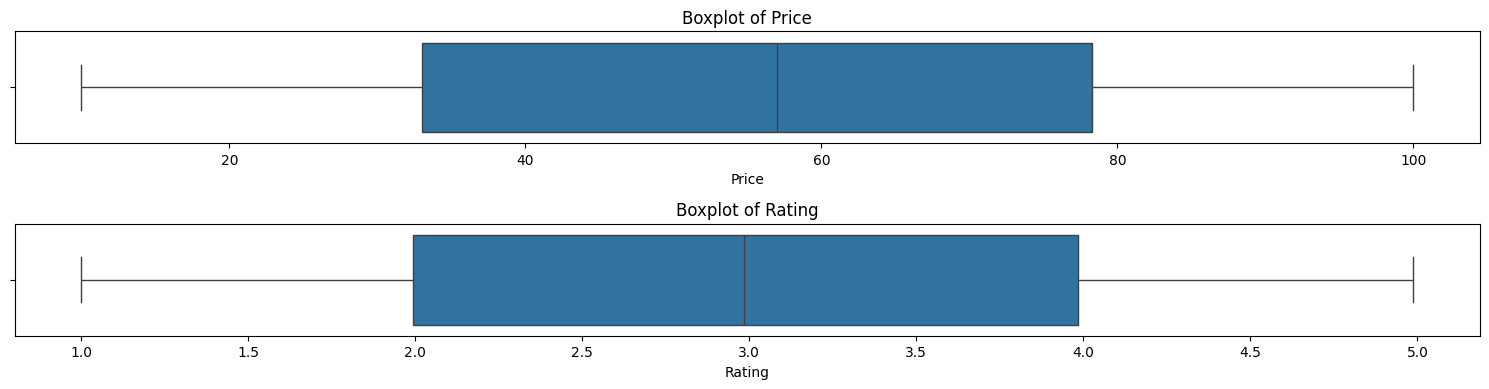

In [ ]:
  # Menentukan kolom numerik kecuali 'CustomerId' dan 'RowNumber'
  numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
  numerical_columns = [col for col in numerical_columns if col not in ['User_ID', 'Product_ID', 'Category']]

  # Menyiapkan ukuran plot
  plt.figure(figsize=(15, len(numerical_columns) * 2))

  # Membuat boxplot untuk setiap kolom numerik yang dipilih
  for i, column in enumerate(numerical_columns, 1):
      plt.subplot(len(numerical_columns), 1, i)
      sns.boxplot(x=df[column])
      plt.title(f'Boxplot of {column}')

  plt.tight_layout()
  plt.show()

Berdasarkan visualisasi boxplot yang dihasilkan, rentang data berada pada nilai normal, baik untuk kolom `price` maupun kolom `rating`.

In [ ]:
df.Product_Name.unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

### Univariate Analysis

Kode berikut digunakan untuk membuat grafik batang (*bar plot*) yang menampilkan distribusi kategori dalam suatu kolom dataset, lengkap dengan persentase masing-masing kategori sebagai teks di atas batang. Visualisasi ini membantu memahami persebaran data kategori secara menyeluruh.

1. **Fungsi `plot_category_counts`**:
   - **Input**: Nama kolom dari dataset yang ingin divisualisasikan.
   - **Proses**:
     - Menghitung jumlah dan persentase masing-masing kategori.
     - Membuat grafik batang menggunakan `seaborn.barplot`.
     - Menambahkan persentase di atas setiap batang untuk memberikan informasi tambahan.

2. **Komponen Visualisasi**:
   - **Judul**: Menjelaskan isi grafik.
   - **Sumbu X dan Y**:
     - X: Kategori dalam kolom.
     - Y: Jumlah kategori.
   - **Teks Persentase**: Memberikan konteks tentang proporsi kategori secara lebih informatif.

3. **Fungsi dalam Aksi**:
   - Pada akhir kode, fungsi ini dipanggil dengan parameter `'Product_Name'` untuk memvisualisasikan distribusi kategori pada kolom tersebut.

<ipython-input-14-54bed1d5c5da>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")


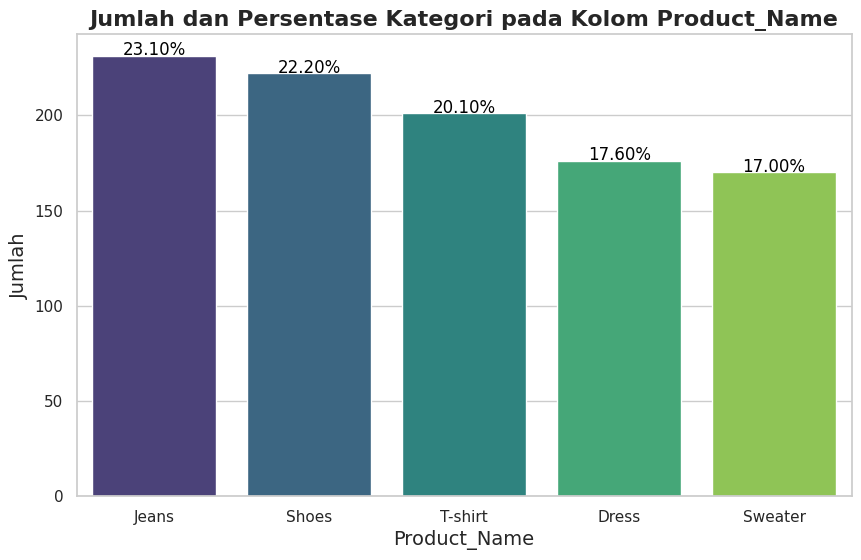

In [ ]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang
    ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.5, f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Product_Name')


Dari grafik batang yang dibuat, terlihat bahwa distribusi produk dalam dataset cukup beragam, dengan beberapa kategori memiliki dominasi lebih besar. Kategori **jeans** memiliki proporsi yang paling besar, yaitu sebanyak 23,1%, diikuti dengan produk **shoes** sebesar 22,2%, **t-shirt** 20,1% dan kategori **sweater** memiliki proporsi yang paling kecil, yaitu sebesar 17%. Hal ini menunjukan pada musim penjualan tersebut, produk-produk *casual* dan *versatile* terjual lebih laris dibanding produk yang berorientasi pada kondisi musim dan acara formal, seperti sweater dan dress.

Grafik berikut membantu dalam memahami distribusi data pada kolom kategori seperti *Brand*, *Product Name*, atau kolom lain yang memiliki tipe data kategorikal.

- Fungsi `plot_category_counts` digunakan untuk:
  1. Menghitung jumlah setiap kategori dalam kolom tertentu.
  2. Menghitung persentase jumlah kategori terhadap total data.
  3. Membuat grafik batang menggunakan *Seaborn*, dengan tampilan estetis menggunakan palet warna `coolwarm`.
  4. Menampilkan jumlah dan persentase kategori dalam grafik.


<ipython-input-15-95002565b1ec>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="coolwarm", alpha=0.8)


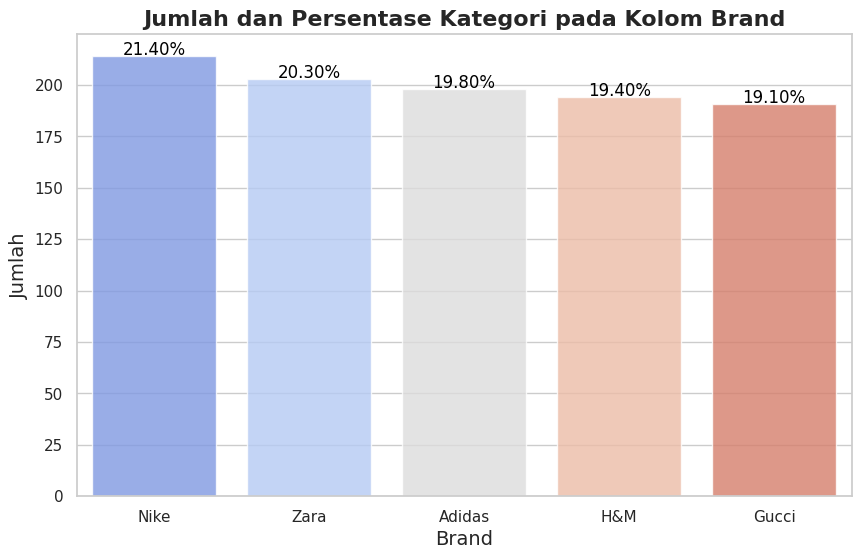

In [ ]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang dengan palet warna yang lebih menarik
    ax = sns.barplot(x=counts.index, y=counts.values, palette="coolwarm", alpha=0.8)

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.5, f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Brand')


Berdasarkan grafik batang yang ditampilkan, merk dengan proporsi penjualan paling tinggi yaitu Nike sebesar 21,4% dan yang terendah adalah merk Gucci yaitu sebesar 19,1%.

Kode berikut digunakan untuk membuat visualisasi grafik batang (*bar plot*) yang menggambarkan jumlah data dalam setiap kategori pada kolom `Color`. Grafik ini bertujuan untuk membantu memahami distribusi data pada kolom kategori tertentu secara lebih jelas dan terperinci.

<ipython-input-16-411f2d8d6e0f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis", alpha=0.9)


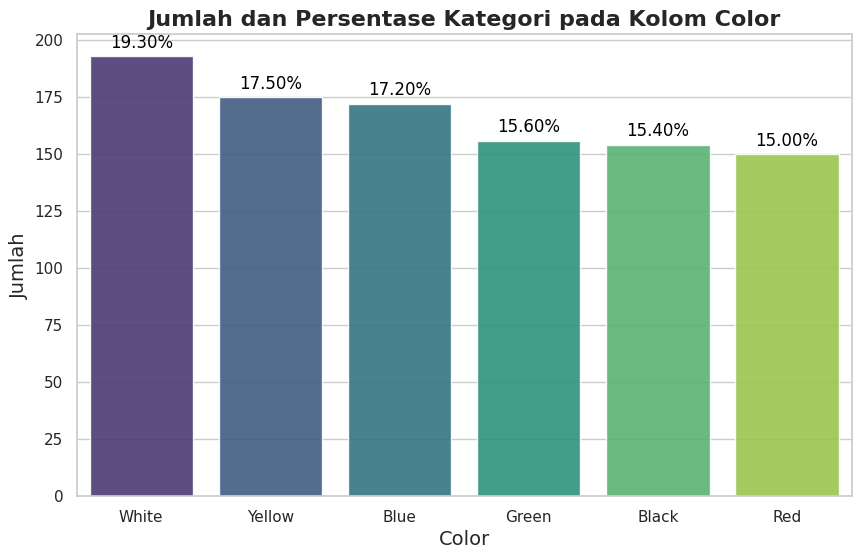

In [ ]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang dengan palet warna yang lebih menarik
    ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis", alpha=0.9)

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.02 * max(counts), f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Color')


Produk yang berwarna putih memiliki proporsi penjualan paling tinggi, yaitu sebesar 19,3%. Sedangkan produk yang berwarna hijau, merah dan hitam memiliki proporsi yang paling rendah. Ketiga warna tersebut memiliki penjualan yang seimbang, yaitu di sekitar 15%.

Kode berikut bertujuan untuk membuat visualisasi distribusi kategori pada kolom `Size` dalam bentuk grafik batang (*bar plot*). Grafik ini menunjukkan jumlah data di setiap kategori pada kolom tersebut serta menambahkan persentase masing-masing kategori untuk memberikan wawasan yang lebih komprehensif.

<ipython-input-17-7ee97beb7bb3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis", alpha=0.9)


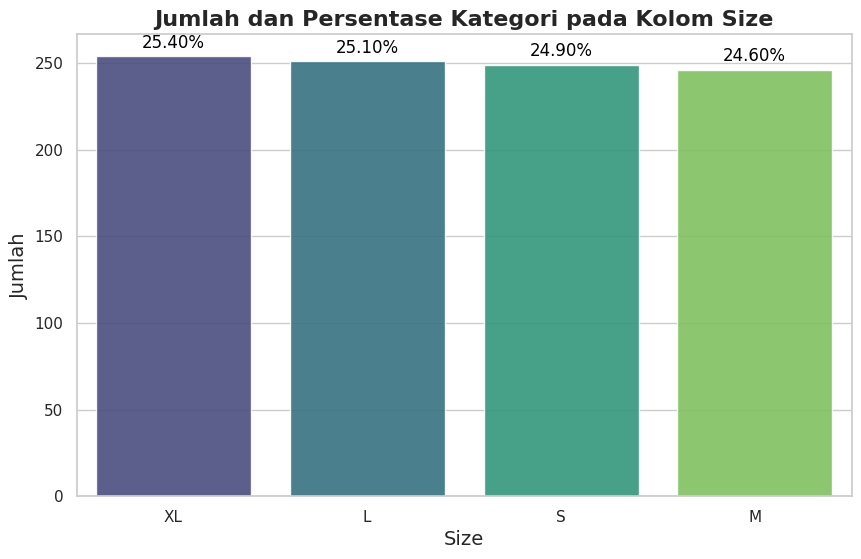

In [ ]:
# Fungsi untuk menampilkan grafik batang dengan persentase sebagai teks
def plot_category_counts(column_name):
    # Menghitung jumlah kategori dan persentase
    counts = df[column_name].value_counts()
    percentages = (counts / counts.sum()) * 100

    # Seting gaya grafik
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Membuat grafik batang dengan palet warna yang lebih menarik
    ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis", alpha=0.9)

    # Menambahkan judul dan label
    plt.title(f'Jumlah dan Persentase Kategori pada Kolom {column_name}', fontsize=16, fontweight='bold')
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)

    # Menambahkan persentase sebagai teks di atas setiap batang
    for i, (count, percent) in enumerate(zip(counts, percentages)):
        ax.text(i, count + 0.02 * max(counts), f'{percent:.2f}%', ha='center', color='black', fontsize=12)

    # Menampilkan grafik
    plt.show()

# Memanggil fungsi dengan kolom yang diinginkan
plot_category_counts('Size')

Proporsi penjualan berdasarkan ukuran, memiliki persentase yang seimbang. Semua ukuran yang terjual, berada di rentang sekitar  25%.

Kode berikut bertujuan untuk mengidentifikasi dan memvisualisasikan 3 produk teratas berdasarkan frekuensi kemunculan untuk setiap merek (*brand*) dalam dataset. Pendekatan ini membantu memahami kontribusi utama produk terhadap performa masing-masing merek.


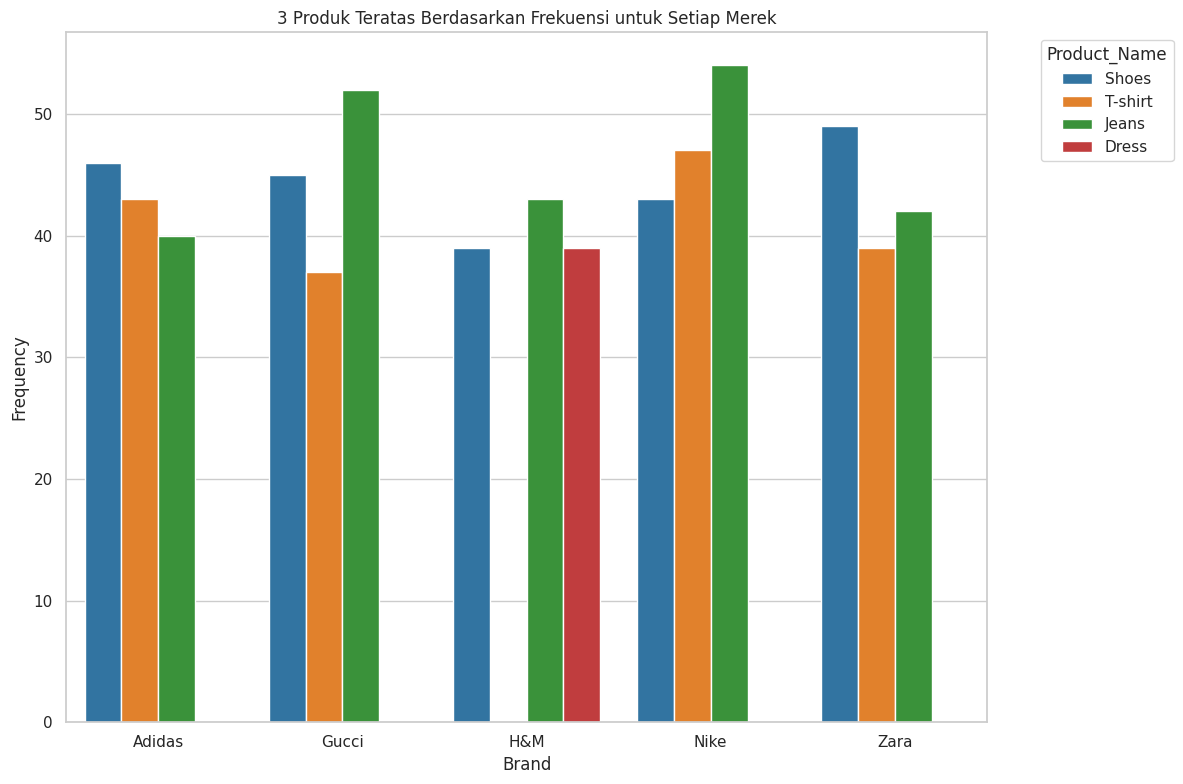

In [ ]:
# Langkah 1: Menghitung frekuensi produk per merek
product_counts = (
    df.groupby(['Brand', 'Product_Name'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Brand', 'Count'], ascending=[True, False])
)

# Langkah 2: Memilih 3 produk teratas untuk setiap merek
top_3_products_per_brand = (
    product_counts.groupby('Brand')
    .head(3)
)

# Langkah 3: Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_3_products_per_brand,
    x="Brand",
    y="Count",
    hue="Product_Name",
    palette="tab10"
)
plt.title("3 Produk Teratas Berdasarkan Frekuensi untuk Setiap Merek")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.legend(title="Product_Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik batang di atas menunjukan top 3 product dari masing-masing merek. Berdasarkan 5 merek yang dijual, 4 diantaranya memiliki jenis produk terlaris yang sama yaitu Adidas, Gucci, Nike dan Zara. Sedangkan untuk merk H&M, kategori T-Shirt tidak masuk ke dalam kategori top 3, melainkan Dress.

Kode berikut bertujuan untuk mengidentifikasi dan memvisualisasikan pola pembelian dari 5 pengguna dengan total transaksi terbanyak dalam dataset. Analisis ini memberikan wawasan tentang kontribusi pengguna tertentu terhadap penjualan produk.


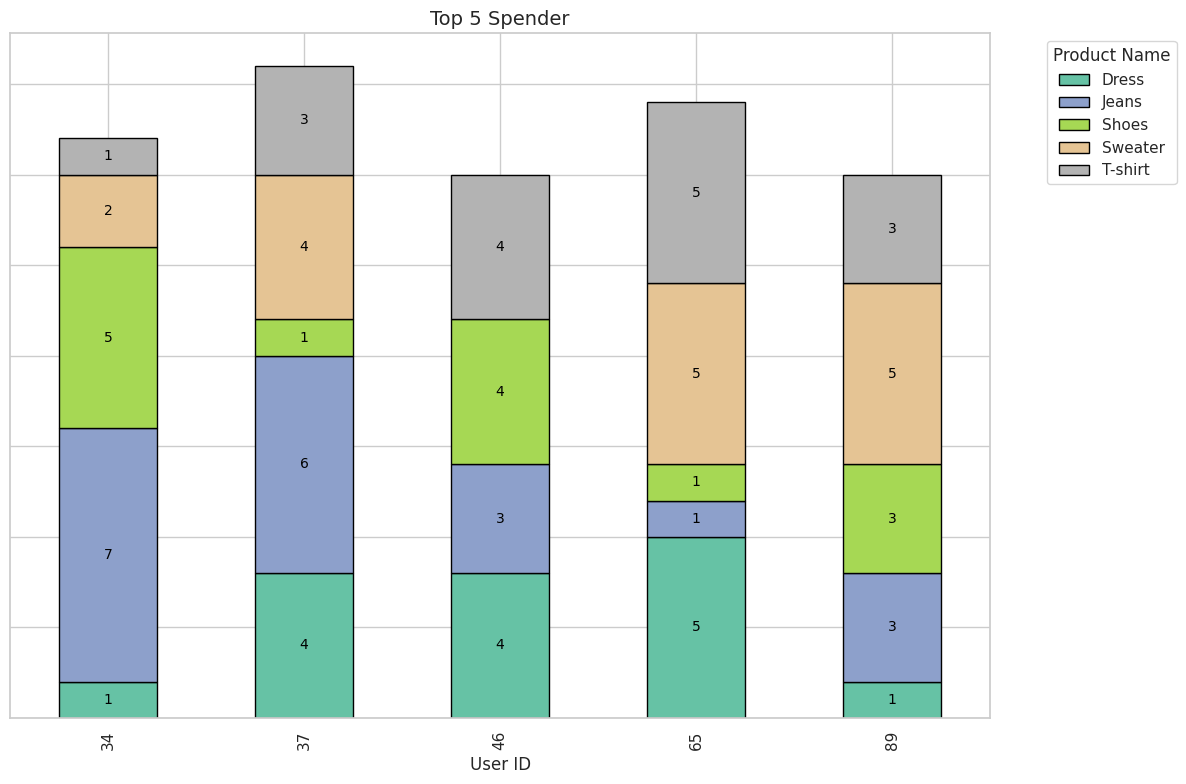

In [ ]:
# Langkah 1: Hitung total pembelian per User ID
user_purchase_counts = (
    df.groupby('User_ID')
    .size()
    .reset_index(name='Total Purchases')
    .sort_values(by='Total Purchases', ascending=False)
)

# Langkah 2: Pilih 5 User ID dengan pembelian terbanyak
top_5_users = user_purchase_counts.head(5)

# Filter data asli untuk 5 User ID tersebut
filtered_df = df[df['User_ID'].isin(top_5_users['User_ID'])]

# Langkah 3: Buat pivot table untuk visualisasi
pivot_table = filtered_df.pivot_table(
    index='User_ID',
    columns='Product_Name',
    aggfunc='size',
    fill_value=0
)

# Langkah 4: Visualisasi dengan label teks
fig, ax = plt.subplots(figsize=(12, 8))
bar_plot = pivot_table.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', edgecolor='black')

# Tambahkan label teks di setiap batang
for container in bar_plot.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Tampilkan hanya jika ada data
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posisi X di tengah batang
                bar.get_y() + height / 2,          # Posisi Y di tengah batang
                f'{int(height)}',                 # Teks label
                ha='center', va='center', fontsize=10, color='black'
            )

# Hilangkan angka pada sumbu Y
ax.set_yticklabels([])
ax.set_ylabel("")
ax.set_title("Top 5 Spender", fontsize=14)
ax.set_xlabel("User ID", fontsize=12)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Pengguna dengan Pengeluaran Tertinggi**
- User ID 37 memiliki pengeluaran tertinggi, didominasi oleh kategori *Jeans*. Kontribusi kategori *Sweater* dan *Dress*, namun dengan proporsi lebih kecil dibandingkan *Jeans*.
- User ID 34 menduduki posisi kedua, dengan pembelian terbesar pada kategori *Shoes*, diikuti oleh *Sweater* dan *Jeans*.

**Distribusi Kategori Produk**
- Kategori Dominan:
  - *Shoes* dan *Sweater* merupakan kategori produk yang paling sering muncul, menunjukkan popularitasnya di antara pembelanja utama.
- Kategori Minoritas:
  - *Dress* memiliki kontribusi terkecil secara keseluruhan, kecuali pada beberapa pengguna tertentu seperti User ID 65.

**Preferensi Pengguna**
Setiap pengguna memiliki preferensi unik terhadap produk:
  - User ID 46 dan 65 memiliki pengeluaran yang relatif merata di beberapa kategori seperti *Shoes*, *Sweater*, dan *T-shirt*.
  - User ID 89 menunjukkan kecenderungan pada *Sweater* dan *Shoes*, tanpa kontribusi signifikan dari kategori lainnya.

## Data Preprocessing

### TF-IDF Vectorizer

Data diproses menggunakan `TfidfVectorizer` dari pustaka `sklearn`, yang dirancang untuk mengubah teks menjadi representasi vektor numerik berbasis TF-IDF (Term Frequency-Inverse Document Frequency). Parameter `stop_words='english'` digunakan untuk menghapus kata-kata umum dalam bahasa Inggris yang tidak memberikan nilai informasi signifikan, seperti "the", "and", dll.

Setiap kolom teks ini diubah menjadi matriks TF-IDF menggunakan `fit_transform`. Proses ini menghasilkan matriks berbentuk `[n_samples, n_features]`, di mana:
     - *n_samples*: Jumlah data (baris).
     - *n_features*: Jumlah fitur unik (kata atau istilah) dalam teks setelah preprocessing.

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Terapkan TF-IDF pada 'Product Name' dan 'Category'
product_name_tfidf = tfidf_vectorizer.fit_transform(df['Product_Name'])
category_tfidf = tfidf_vectorizer.fit_transform(df['Category'])
color_tfidf = tfidf_vectorizer.fit_transform(df['Color'])
size_tfidf = tfidf_vectorizer.fit_transform(df['Size'])


# Menampilkan bentuk matriks TF-IDF
print(product_name_tfidf.shape)
print(category_tfidf.shape)
print(color_tfidf.shape)
print(size_tfidf.shape)

(1000, 5)
(1000, 4)
(1000, 6)
(1000, 1)


   Menggunakan fungsi `hstack` dari `scipy.sparse`, matriks TF-IDF dari masing-masing kolom digabung secara horizontal. Matriks hasil penggabungan mengintegrasikan informasi dari berbagai atribut menjadi satu representasi yang komprehensif.

In [ ]:
# Menggabungkan matriks TF-IDF
combined_tfidf = hstack([product_name_tfidf, category_tfidf, color_tfidf, size_tfidf])

# Menampilkan bentuk matriks gabungan
print(combined_tfidf.shape)

(1000, 16)


Menyimpan model menggunakan modul pickle

In [ ]:
# Simpan matriks TF-IDF yang sudah digabungkan
with open('combined_tfidf.pkl', 'wb') as f:
    pickle.dump(combined_tfidf, f)

Metode .todense() pada objek sparse matrix seperti yang dihasilkan oleh TF-IDF Vectorizer (dalam library seperti scikit-learn) digunakan untuk mengubah representasi sparse matrix menjadi dense matrix.

In [ ]:
combined_tfidf.todense()

matrix([[1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

### Cosine Similiarity

Cosine similarity adalah metrik yang digunakan untuk mengukur kesamaan antara dua vektor berdasarkan sudut kosinus di antara keduanya dalam ruang multidimensi. Metrik ini sangat populer dalam pemrosesan teks dan aplikasi berbasis data seperti sistem rekomendasi, karena berfokus pada orientasi vektor (arah) daripada magnitudo vektor. Berikut adalah kode yang digunakan untuk memnggunakan cosine similiarity dari library scikit-learn.

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(combined_tfidf)
cosine_sim

array([[1.        , 0.34107689, 0.54538125, ..., 0.28867513, 0.05240176,
        0.05240176],
       [0.34107689, 1.        , 0.28867513, ..., 0.06050834, 0.33333333,
        0.66666667],
       [0.54538125, 0.28867513, 1.        , ..., 0.05240176, 0.28867513,
        0.28867513],
       ...,
       [0.28867513, 0.06050834, 0.05240176, ..., 1.        , 0.06050834,
        0.39384167],
       [0.05240176, 0.33333333, 0.28867513, ..., 0.06050834, 1.        ,
        0.33333333],
       [0.05240176, 0.66666667, 0.28867513, ..., 0.39384167, 0.33333333,
        1.        ]])

Membuat referensi produk terhadap kombinasi fitur dari pemesanan

In [ ]:
# Contoh: Produk referensi (ID produk)
reference_product_id = 413  # Ganti dengan ID produk yang diinginkan

In [ ]:
# Ambil skor kesamaan untuk produk referensi
similarity_scores = cosine_sim[reference_product_id]

# Urutkan skor kesamaan
similar_products = sorted(list(enumerate(similarity_scores)), key=lambda x: x[1], reverse=True)

# Ambil 5 produk teratas (selain produk referensi itu sendiri)
top_5_products = [i[0] for i in similar_products[1:6]]

print("Produk Rekomendasi:")
print(df.iloc[top_5_products][['Product_ID','Product_Name', 'Brand', 'Color', 'Size']].to_string(index=False))

Produk Rekomendasi:
 Product_ID Product_Name Brand  Color Size
         10      T-shirt  Zara  White   XL
         12      Sweater Gucci Yellow    M
         13        Jeans  Nike    Red    M
         23        Jeans  Zara Yellow    M
         25      Sweater   H&M  Green    S


# Collaborative Filtering

## Data Preprocessing

Dataset dipersiapkan dengan langkah berikut:

1. **Impor Library**: Gunakan `pandas` untuk manipulasi data dan `numpy` untuk operasi numerik.
2. **Filter Data**: Ambil kolom `User_ID`, `Product_ID`, dan `Rating` sebagai data utama.
3. **Encoding ID**: Ubah `User_ID` dan `Product_ID` menjadi indeks numerik untuk mempermudah pengolahan data.
4. **Skala Rating (Opsional)**: Normalisasi nilai rating menjadi rentang 0 hingga 1.
5. **Pembagian Data**: Pisahkan dataset menjadi 80% data latih dan 20% data uji menggunakan `train_test_split`.
6. **Verifikasi Data**: Tampilkan data latih dan uji untuk memastikan pembagian berhasil.

In [ ]:
# Contoh dataset
collaborative = df[['User_ID', 'Product_ID', 'Rating']]

# Encode User_ID dan Product_ID menjadi indeks numerik
user_ids = collaborative['User_ID'].unique().tolist()
product_ids = collaborative['Product_ID'].unique().tolist()

user_to_index = {user_id: i for i, user_id in enumerate(user_ids)}
product_to_index = {product_id: i for i, product_id in enumerate(product_ids)}

collaborative['user'] = collaborative['User_ID'].map(user_to_index)
collaborative['product'] = collaborative['Product_ID'].map(product_to_index)

# Skala Rating antara 0 dan 1 (opsional, tergantung dataset)
collaborative['rating'] = collaborative['Rating'] / collaborative['Rating'].max()

# Pisahkan data train dan test
train, test = train_test_split(collaborative, test_size=0.2, random_state=42)

print("Data Train:\n", train.head())
print("Data Test:\n", test.head())

Data Train:
      User_ID  Product_ID    Rating  user  product    rating
29        20          30  3.110114    25       29  0.623524
535       82         536  3.347461    24      535  0.671108
695       81         696  4.592767    82      695  0.920770
557        2         558  2.026682    57      557  0.406315
836       59         837  2.406013    80      836  0.482364
Data Test:
      User_ID  Product_ID    Rating  user  product    rating
521       24         522  2.939080    40      521  0.589234
737       30         738  1.033843    86      737  0.207268
740       49         741  3.386837    88      740  0.679002
660       30         661  1.533612    86      660  0.307463
411       66         412  3.402410    90      411  0.682124


<ipython-input-46-92edefdffb88>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collaborative['user'] = collaborative['User_ID'].map(user_to_index)
<ipython-input-46-92edefdffb88>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collaborative['product'] = collaborative['Product_ID'].map(product_to_index)
<ipython-input-46-92edefdffb88>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## Model Development

## Model Rekomendasi Neural Network

Model menggunakan TensorFlow dan Keras untuk merekomendasikan produk berdasarkan interaksi pengguna dan produk. Berikut penjelasan komponennya:

1. **Embedding**:
   - Representasi numerik untuk pengguna dan produk dengan ukuran `embedding_size`.
   - Menggunakan regularisasi `l2` untuk mencegah overfitting.

2. **Dot Product**:
   - Menghitung kesamaan antara embedding pengguna dan produk sebagai dasar prediksi.

3. **Lapisan Tambahan**:
   - **Dropout**: Mencegah overfitting dengan mematikan sebagian koneksi selama pelatihan.
   - **Dense**: Lapisan sepenuhnya terhubung dengan aktivasi `relu` untuk menangkap hubungan non-linear.
   - **Output Layer**: Menghasilkan nilai rating dengan aktivasi linear.

4. **Proses Forward (`call`)**:
   - Embedding pengguna dan produk dihitung, lalu diproses melalui `dot`, `dropout`, dan `dense`.
   - Hasil akhir adalah prediksi rating.

Model ini dirancang untuk memberikan prediksi produk rekomendasi berdasarkan interaksi pengguna dan produk.

In [ ]:
class RecommenderNet(Model):
    def __init__(self, num_users, num_products, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        # Embedding untuk pengguna dan produk
        self.user_embedding = Embedding(num_users, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.product_embedding = Embedding(num_products, embedding_size, embeddings_initializer="he_normal", embeddings_regularizer=tf.keras.regularizers.l2(1e-6))

        # Lapisan dot product untuk kesamaan
        self.dot = Dot(axes=1)

        # Tambahkan lapisan Dropout dan Dense di dalam __init__
        self.dropout = Dropout(0.2)
        self.dense = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.output_layer = Dense(1, activation='linear') # Output layer untuk rating

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[0])
        product_vector = self.product_embedding(inputs[1])
        dot_product = self.dot([user_vector, product_vector])

        # Teruskan output dot product melalui lapisan Dropout dan Dense
        x = self.dropout(dot_product)
        x = self.dense(x)
        output = self.output_layer(x)  # Output layer untuk rating

        return output

## Train Model

## Pelatihan Model Rekomendasi

1. **Parameter Model**:
   - `num_users`: Jumlah pengguna unik.
   - `num_products`: Jumlah produk unik.
   - `embedding_size`: Ukuran vektor embedding (default 50).

2. **Inisialisasi Model**:
   - Model menggunakan arsitektur *RecommenderNet* yang dirancang untuk memprediksi rating.

3. **Kompilasi Model**:
   - *Loss*: `mean_squared_error` untuk menghitung error prediksi.
   - *Optimizer*: Adam dengan *learning rate* 0.0001.
   - *Metrics*: `mean_squared_error` untuk evaluasi.

4. **Data Latih dan Uji**:
   - Input: Indeks numerik pengguna dan produk (`user` dan `product`).
   - Target: Rating (`rating`).

5. **Pelatihan Model**:
   - *Batch size*: 64 data per iterasi.
   - *Epochs*: 100 putaran pelatihan.
   - *Validation*: Mengevaluasi model pada data uji setiap epoch.


In [ ]:
# Parameter model
num_users = len(user_ids)
num_products = len(product_ids)
embedding_size = 50

# Model
model = RecommenderNet(num_users, num_products, embedding_size)

# Compile model
model.compile(
    loss="mean_squared_error",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"]
)

# Data untuk model
x_train = [train['user'].values, train['product'].values]
y_train = train['rating'].values

x_test = [test['user'].values, test['product'].values]
y_test = test['rating'].values

# Latih model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.4290 - mean_squared_error: 0.4096 - val_loss: 0.3917 - val_mean_squared_error: 0.3724
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4151 - mean_squared_error: 0.3958 - val_loss: 0.3799 - val_mean_squared_error: 0.3608
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4133 - mean_squared_error: 0.3942 - val_loss: 0.3678 - val_mean_squared_error: 0.3489
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3912 - mean_squared_error: 0.3723 - val_loss: 0.3554 - val_mean_squared_error: 0.3366
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3769 - mean_squared_error: 0.3582 - val_loss: 0.3424 - val_mean_squared_error: 0.3238
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3460 - mean_squared_error: 0.3276 - val_loss: 0.3289 - val_mean_squared_error: 0.3106
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3370 - mean_squared_error: 0.3188 - val_loss: 0.3151 - v

-   **Loss (train loss): 0.0106**  
    Nilai loss ini menunjukkan seberapa baik model memprediksi rating pada data pelatihan. Dengan menggunakan fungsi loss *mean squared error (MSE)*, nilai ini menunjukkan rata-rata kuadrat dari kesalahan prediksi. Nilai yang kecil seperti 0.0106 menandakan bahwa model telah mempelajari pola data dengan baik pada set pelatihan.
    
-   **Mean Squared Error (MSE): 0.0015**  
    MSE untuk data pelatihan menunjukkan bahwa rata-rata kesalahan prediksi model sangat kecil dalam hal skala rating yang digunakan. Hal ini mendukung bahwa model memiliki performa yang baik pada data pelatihan.
    
-   **Validation Loss: 0.0671**  
    Validation loss mengukur performa model pada data validasi yang tidak dilibatkan dalam pelatihan. Nilai ini lebih tinggi dibandingkan train loss, yang mengindikasikan bahwa model sedikit kesulitan untuk sepenuhnya generalisasi pola dari data pelatihan ke data baru. Namun, selisih yang tidak terlalu besar (0.0671 vs 0.0106) menandakan bahwa model tidak mengalami overfitting yang signifikan.
    
-   **Validation MSE: 0.0581**  
    MSE pada data validasi lebih tinggi dibandingkan data pelatihan, menunjukkan adanya sedikit perbedaan antara prediksi model pada data yang belum dilihat sebelumnya dibandingkan dengan data pelatihan. Namun, nilai ini tetap cukup rendah, menandakan bahwa model telah mempelajari hubungan antara pengguna dan produk secara efektif.

Secara keseluruhan, hasil ini menunjukkan bahwa model `RecommenderNet` memiliki performa yang baik dan mampu memprediksi rating dengan tingkat kesalahan yang rendah pada data pelatihan maupun data validasi.

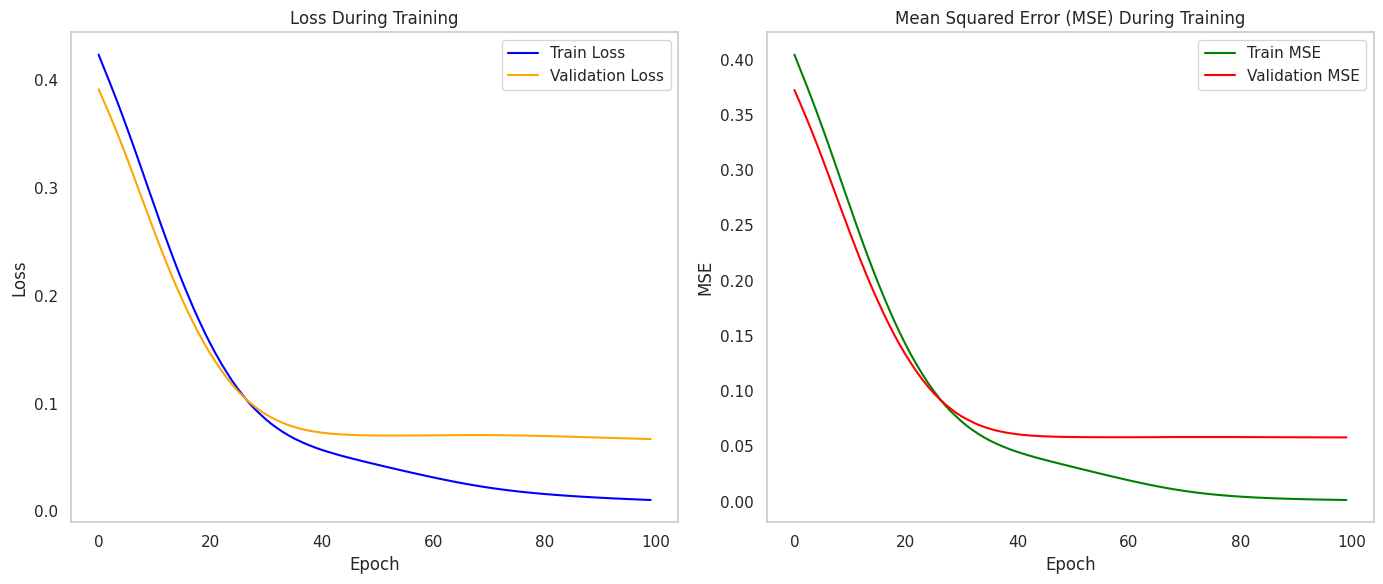

In [ ]:
# Fungsi untuk visualisasi pelatihan
def plot_training_history(history):
    # Ambil nilai loss dan mse dari history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_mse = history.history['mean_squared_error']
    val_mse = history.history['val_mean_squared_error']

    # Buat grafik Loss
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Buat grafik MSE
    plt.subplot(1, 2, 2)
    plt.plot(train_mse, label='Train MSE', color='green')
    plt.plot(val_mse, label='Validation MSE', color='red')
    plt.title('Mean Squared Error (MSE) During Training')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk memvisualisasikan
plot_training_history(history)

Dari visualisasi plotloss yang ditampilkan, dapat diketahui bahwa peningkatan performa model mulai melandai pada epoch sekitar 30. Hal tersebut terjadi pada data latih maupun data validasi MSE. Namun, penurunan performa model masih dalam kualitas baik, yaitu dengan hasil akhir berkisar 0,5 dan 0,1.